# MECA511 - TD 15-16 :  Analyse d'un champ de déplacement mesurée expérimentalement par corrélation d'images





In [4]:
%matplotlib ipympl
from IPython.display import IFrame

## Introduction

### Contexte

Le travail proposé dans ces deux séances de TD est inspiré de l'article : J.-C. Passieux, F. Bugarin, C. David, J.-N. Périé, L. Robert, *"Multiscale Displacement Field Measurement Using Digital Image Correlation: Application to the Identification of Elastic Properties", Exp Mech 55 (2015) 121–137*. 

Une copie de l'article est jointe à ce notebook dans le dossier `biblio/` et est visible ci-dessous:



In [5]:
IFrame("biblio/Passieux2014.pdf", width=800, height=800)

### Objectifs des TDs:

Les mesures expérimentales par **corrélation d'images numériques** (DIC en anglais) permettent d'obtenir le **champ de déplacement** à la surface d'un objet soumis à une sollicitation mécanique en analysant des images successives de sa surface.
Dans ces 2 TDs nous allons:

1. Analyser un champ de déplacement mesuré expérimentalement par corrélation d'images.
2. Déterminer les déformations à partir de ce champ de déplacement.
3. Calculer les contraintes à partir des déformations en faisant l'hypothèse d'un matériau isotrope linéaire élastique.
4. Estimer l'effort de traction appliqué sur l'éprouvette.
5. Vérifier si l'état de contrainte respecte les équations d'équilibre locales.

### Installation des librairies
Pour installer les librairies nécessaires pour ce TD, exécuter la cellule suivante, puis redémarrer le kernel.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import py7DPost.core as py7D

### Fonction de dérivation numérique
Si l'on souhaite calculer la dérivée de $u_x(x,y)$ par rapport à $x$ on vous fournit les fonctions suivantes:

```python
dux_dx = diff_x(ux)
```

de même pour la dérivée par rapport à $y$
```python
dux_dy = diff_y(ux)
```

In [7]:
def diff_x(V):
    return np.gradient(V, X[0],axis=1)

def diff_y(V):
    return np.gradient(V, Y[:,1],axis=0)

### Import des données expérimentales de mesure du champ de déplacement

On vous fournit des données qui ont été pré traitées.
Elles comportent notamment:

* Les coordonnées en pixels associées aux clés `X` et `Y`.
* Les champs de déplacements en pixels associés aux clés `dx`et `dy`.
* Des métadonnées comme la taille des pixels `pix2mm`.

On charge charges ces données de la manière suivante:

In [8]:
# DATA LOADING AND KEY DISPLAY
data = py7D.read7DData('data/DIC_data.mat')
data.keys()

no data named exx in 7D mat file.
no data named eyy in 7D mat file.
no data named exy in 7D mat file.


dict_keys(['pix2mm', 'X', 'Y', 'dx', 'dy', 'exx', 'eyy', 'exy', 'norm_d'])

**Remarque**: vous avez probablement un warning car `exx`, `eyy` et `ezz` ne sont pas définies. C'est normal, c'est le but du TD de les calculer !

In [9]:
# DATA EXTRACTION
pix2mm = data["pix2mm"] # conversion factor from pixels to mm
X_pix = data['X'] # pixel coordinates
Y_pix = data['Y'] # pixel coordinates
X = X_pix * pix2mm # mm coordinates
Y = Y_pix * pix2mm # mm coordinates
ux = data['dx'][-1] * pix2mm # displacement field in mm
uy = data['dy'][-1] * pix2mm # displacement field in mm

### Import de l'image de l'éprouvette en configuration déformée

Nous avons les données de précalculées et nous voulons les afficher sur les images déformées. 
On va donc charger une image:

In [10]:
img_path = 'data/ohtcfrp_11.tif'
img = plt.imread(img_path)[::-1]

### Tracé des champs de déplacement $u_x$ et $u_y$:

On peut tracer les champs de déplacement $u_x$ et $u_y$ à l'aide du code suivant :

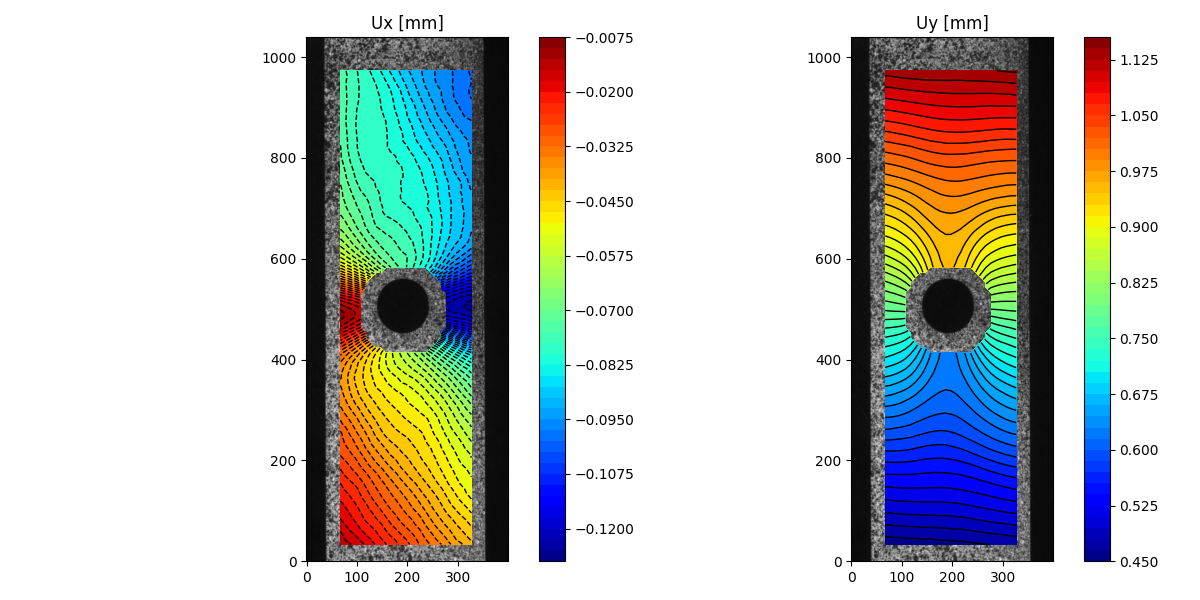

In [37]:
cmap = plt.cm.jet
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ux
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, ux, cmap=cmap, levels=50)

axes[0].set_title('Ux [mm]')
fig.colorbar(cax1, ax=axes[0])
axes[0].contour(X_pix, Y_pix, ux, levels=50, colors='k', linewidths=1.)

# Plot uy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, uy, cmap=cmap, levels=50)
axes[1].set_title('Uy [mm]')
fig.colorbar(cax2, ax=axes[1])
axes[1].contour(X_pix, Y_pix, uy, levels=50, colors='k', linewidths=1.)
plt.tight_layout()
plt.show()

## Travail demandé

A vous de jouer à partir d'ici !

### Q1 : Calcul des déformations

Sur la base des champs de déplacement mesurés, calculer les déformations $\varepsilon_{xx}$, $\varepsilon_{yy}$ et $\varepsilon_{xy}$.

Pour cela appuyez-vous sur les fonctions de dérivation numérique définie plus haut. 
Le code fourni ci dessous ne calcule rien, vous devez remplacer les `np.zeros_like` qui renvoient des tableaux pleins de zéros par un code qui fonctionne.


In [12]:
# TODO : COMPLETER POUR CALCULER LES DEFORMATIONS
exx = np.zeros_like(ux)
eyy = np.zeros_like(ux)
exy = np.zeros_like(ux)

### Tracé des champs de déformation

Tracez vos champs de déformation avec le code suivant:

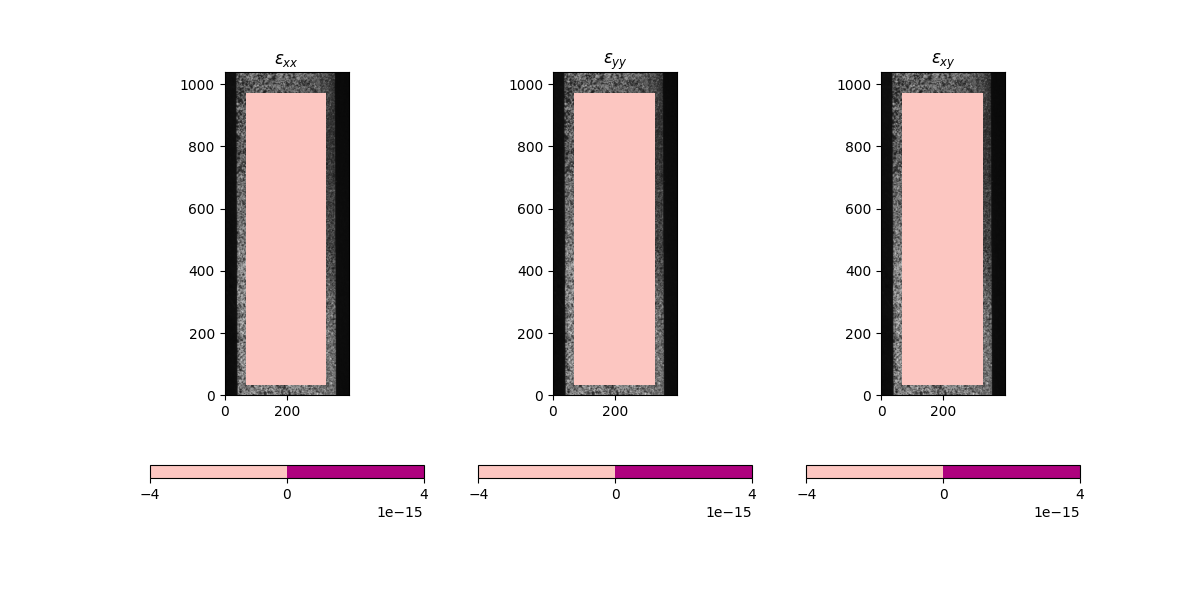

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (12, 6))

# Plot exx
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, exx, cmap=cmap, levels=50)
axes[0].set_title(r'$\varepsilon_{xx}$')
fig.colorbar(cax1, ax=axes[0], orientation = "horizontal")

# Plot eyy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, eyy, cmap=cmap, levels=50)
axes[1].set_title(r'$\varepsilon_{yy}$')
fig.colorbar(cax2, ax=axes[1], orientation = "horizontal")

# Plot exy
axes[2].imshow(img, origin='lower')
cax3 = axes[2].contourf(X_pix, Y_pix, exy, cmap=cmap, levels=50)
axes[2].set_title(r'$\varepsilon_{xy}$')
fig.colorbar(cax3, ax=axes[2], orientation = "horizontal")

plt.show()

### Q2 : Calcul de la déformation normale suivant z

#### Calcul
En supposant que :
- l'éprouvette est mince,
- et le matériau est isotrope élastique

Calculer la déformation normale suivant $\vec z$ notée $\varepsilon_{zz}$.

On prendra:
* $E = 21 GPa$ et,
* $\nu = 0.15$

In [14]:
# TODO : A COMPLETER

ezz = np.zeros_like(ux)

#### Tracé du champ de déformation normale suivant $\vec z$

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/3598194619.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.title('$\epsilon_{zz}$')


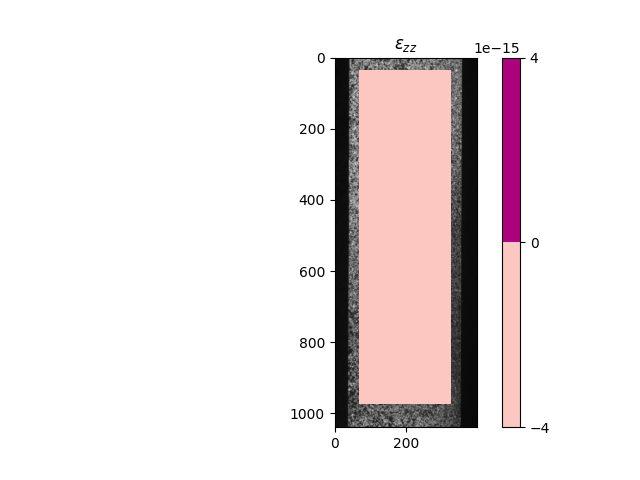

In [15]:
plt.figure()
plt.imshow(img)
plt.contourf(X_pix,Y_pix,ezz, cmap=cmap, levels=50)
plt.title('$\epsilon_{zz}$')
plt.colorbar()
plt.show()

### Q3 : Calcul du tenseur des contraintes

En appliquant l'hypothèse de contrainte plane et la loi de Hooke, calculer le tenseur des contraintes $\sigma_{xx}$, $\sigma_{yy}$ et $\sigma_{xy}$.

In [16]:
# TODO : A VOUS DE JOUER !
sigxx = np.zeros_like(ux)
sigyy = np.zeros_like(ux)
sigxy = np.zeros_like(ux)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/1561039919.py:6: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('$\sigma_{xx}$')
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/1561039919.py:12: SyntaxWarning: invalid escape sequence '\s'
  axes[1].set_title('$\sigma_{yy}$')
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/1561039919.py:18: SyntaxWarning: invalid escape sequence '\s'
  axes[2].set_title('$\sigma_{xy}$')


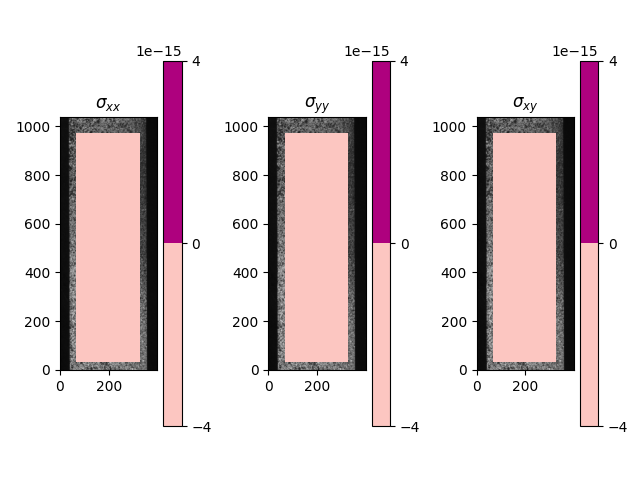

In [17]:
fig, axes = plt.subplots(1, 3)

# Plot sigxx
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, sigxx, cmap=cmap, levels=50)
axes[0].set_title('$\sigma_{xx}$')
fig.colorbar(cax1, ax=axes[0])

# Plot sigyy
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, sigyy, cmap=cmap, levels=50)
axes[1].set_title('$\sigma_{yy}$')
fig.colorbar(cax2, ax=axes[1])

# Plot sigxy
axes[2].imshow(img, origin='lower')
cax3 = axes[2].contourf(X_pix, Y_pix, sigxy, cmap=cmap, levels=50)
axes[2].set_title('$\sigma_{xy}$')
fig.colorbar(cax3, ax=axes[2])
plt.tight_layout()
plt.show()

### Q4 : Intégration des contraintes et calcul de la force de traction suivant y en haut de l'éprouvette
En intégrant les contraintes suivant x, calculer la force de traction appliquée sur l'éprouvette.
On répètera ce calcul sur une coupure fictive en haut puis en bas de l'éprouvette.
Ces valeurs doivent être égales, pourquoi ?
Le sont-elles ? Si non, pourquoi ?
L'épaisseur de l'éprouvette est de $1.26$ mm.

In [18]:
# TODO : A VOUS DE JOUER !
Fy_haut = 0. 
Fy_bas = 0.

### Q5 : Équilibre local
On souhaite vérifier si l'état de contrainte respecte les équations d'équilibre locales.
$$
\vec{div}(\underline{\underline{\sigma}}) + \vec f = \vec 0
$$
Ici on néglige les forces de volume, donc :
$$
\vec{div}(\underline{\underline{\sigma}}) = \vec 0
$$


Que pensez-vous des valeurs obtenues de $\vec{div}(\underline{\underline{\sigma}})$ ?

Que peut-on en conclure ? Quelles sont les pistes d'amélioration ?

In [19]:
# TODO : COMPLETER LES FONCTIONS DE DE CALCUL DU DIVERGENT

div_x = np.zeros_like(ux)
div_y = np.zeros_like(ux)

### Tracé des composantes de $\vec{div}(\underline{\underline{\sigma}})$

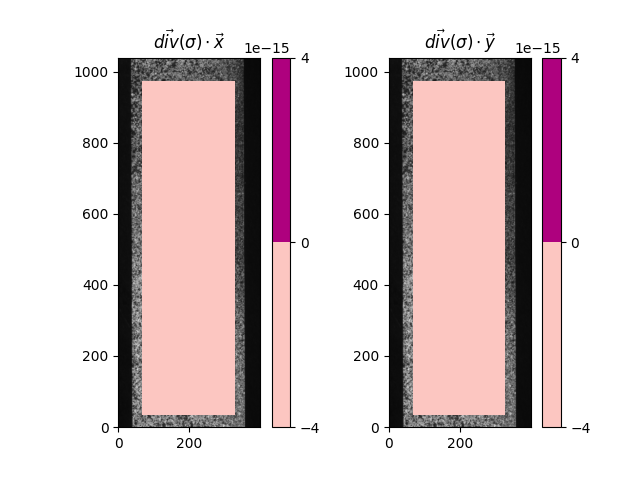

In [20]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, div_x,  cmap=cmap, levels=50)
axes[0].set_title(r'$\vec{div}(\sigma) \cdot \vec x$')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, div_y,  cmap=cmap, levels=50)
axes[1].set_title(r'$\vec{div}(\sigma) \cdot \vec y$')
fig.colorbar(cax2, ax=axes[1])

plt.show()

### Q6 : avec une loi de comportement plus riche


D'après l'article, le matériau est orthotrope et non isotrope avec les propriétés suivantes :

* $E_y$ = 20 GPa
* $E_x$ = 14 GPa
* $\nu_{xy}$ = 0.3
* $G_{xy}$ = 2 GPa

Une [loi élastique orthotrope linéaire](https://help.solidworks.com/2021/english/solidworks/cworks/c_Linear_Elastic_Orthotropic.htm) dans le cas de contrainte plane s'exprime :

$$
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy}
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{E_y}{1 - \nu_{yx} \nu_{xy}} & \dfrac{\nu_{yx} E_x}{1 - \nu_{yx} \nu_{xy}} & 0 \\
\dfrac{\nu_{xy} E_y}{1 - \nu_{yx} \nu_{xy}} & \dfrac{E_x}{1 - \nu_{yx} \nu_{xy}} & 0 \\
0 & 0 & 2G_{yx}
\end{bmatrix}
\begin{bmatrix}
\varepsilon_{xx} \\
\varepsilon_{yy} \\
\varepsilon_{xy}
\end{bmatrix}.
$$

Dans ce contexte:
* Recaluler les contraint avec cette nouvelle hypothèse
* Recalculer la force de traction
* Recalculer $\vec{div}(\underline{\underline{\sigma}})$
* Que pensez-vous des valeurs obtenues de $\vec{div}(\underline{\underline{\sigma}})$ ?

In [21]:
# TODO : A VOUS D'ECRIRE LE CODE QUI CORRESPOND


### Trace des composante de $\vec{div}(\sigma)$

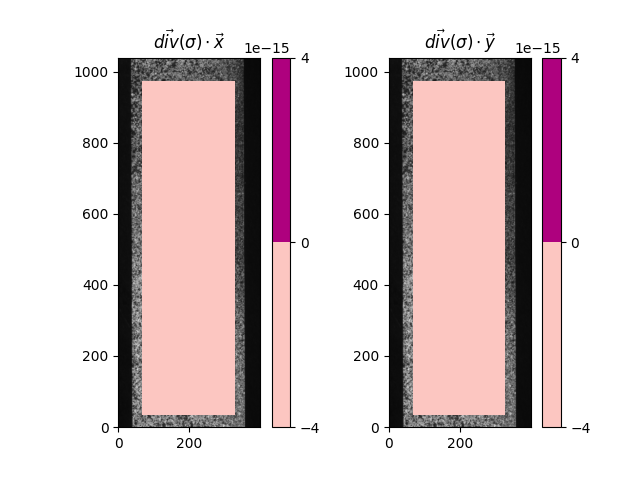

In [22]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, div_x,  cmap=cmap, levels=50)
axes[0].set_title(r'$\vec{div}(\sigma) \cdot \vec x$')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, div_y,  cmap=cmap, levels=50)
axes[1].set_title(r'$\vec{div}(\sigma) \cdot \vec y$')
fig.colorbar(cax2, ax=axes[1])

plt.show()

### Q7 : Contrainte et direction principales

Calculer les contraintes et les directions principales.

In [23]:
Sig_I = np.zeros_like(ux)
Sig_II = np.zeros_like(ux)
Theta_I = np.zeros_like(ux)


#### Tracé des contraintes principales

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/3857782281.py:6: SyntaxWarning: invalid escape sequence '\s'
  axes[0].set_title('$\sigma_I$')
/var/folders/67/hblp6z8n36ldk_9_bl9g80kh0000gn/T/ipykernel_49239/3857782281.py:12: SyntaxWarning: invalid escape sequence '\s'
  axes[1].set_title('$\sigma_{II}$')


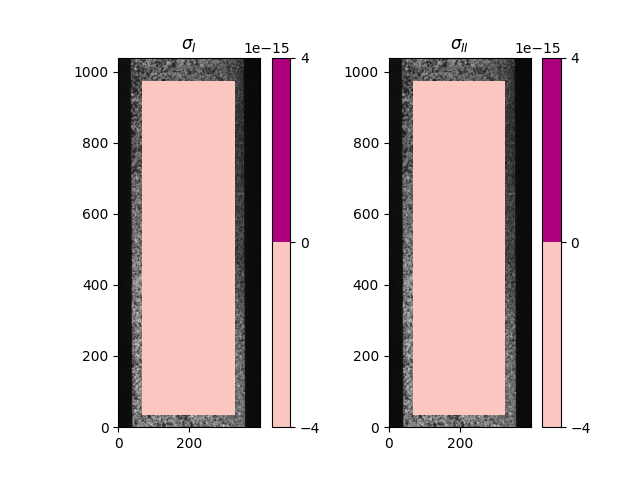

In [24]:
fig, axes = plt.subplots(1, 2)

# Plot div_x
axes[0].imshow(img, origin='lower')
cax1 = axes[0].contourf(X_pix, Y_pix, Sig_I,  cmap=cmap, levels=50)
axes[0].set_title('$\sigma_I$')
fig.colorbar(cax1, ax=axes[0])

# Plot div_y
axes[1].imshow(img, origin='lower')
cax2 = axes[1].contourf(X_pix, Y_pix, Sig_II,  cmap=cmap, levels=50)
axes[1].set_title('$\sigma_{II}$')
fig.colorbar(cax2, ax=axes[1])

plt.show()

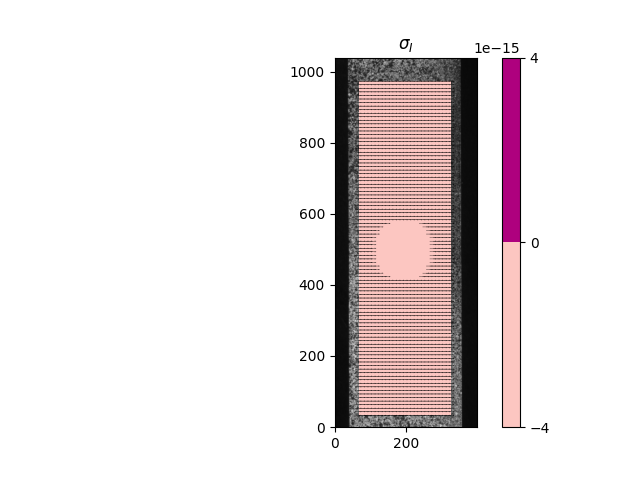

In [25]:
fig, axes = plt.subplots(1, 1)

# Plot div_x
axes.imshow(img, origin='lower')
cax1 = axes.contourf(X_pix, Y_pix, Sig_I,  cmap=cmap, levels=50)
axes.quiver(X_pix, Y_pix, np.cos(Theta_I), np.sin(Theta_I),  pivot='mid', scale=1 / 0.05)
axes.set_title(r'$\sigma_I$')
fig.colorbar(cax1, ax=axes)
plt.show()

### Q8 : Calcul de la contrainte équivalente de von Mises

- Calculer la contrainte équivalente de von Mises.
- La limite d'élasticité du matériau est d’environ $250$ MPa. Y a-t-il des zones de l'éprouvette qui sont critiques ?

In [26]:
# TODO
sig_eq = np.zeros_like(ux)

#### Tracé de la contrainte equivalente de Von Mises

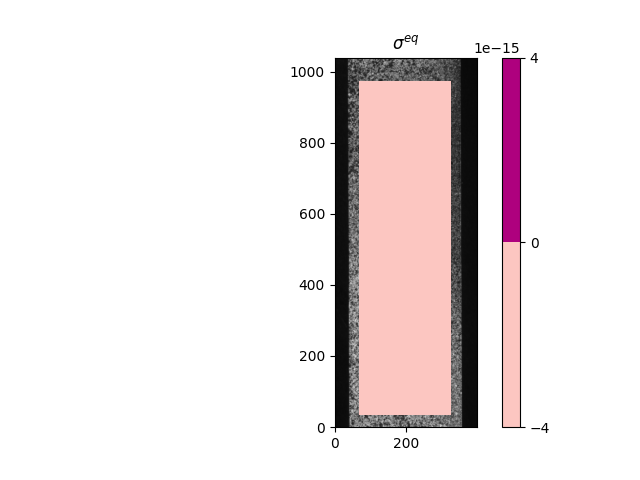

In [27]:
fig, axes = plt.subplots(1, 1)

# Plot equivalent stress
axes.imshow(img, origin='lower')
cax1 = axes.contourf(X_pix, Y_pix, sig_eq,  cmap=cmap, levels=50)
axes.set_title(r'$\sigma^{eq}$')
fig.colorbar(cax1, ax=axes)
plt.show()